In [2]:
!pip install deepface
from deepface import DeepFace
import cv2

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    try:
        result = DeepFace.analyze(frame, actions=['emotion'])
        emotion = result['dominant_emotion']

        cv2.putText(frame, emotion, (50, 50),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    except:
        pass

    # cv2.imshow("Real-Time Emotion Detector", frame) # Removed as it causes an error in Colab

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
# cv2.destroyAllWindows() # Removed as it causes an error in Colab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.0/297.0 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 86.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 84.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.1/250.1 kB 18.6 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.14.0
    Uninstalling sympy-1.14.0:
      Successfully uninstal

In [3]:
# realtime_emotion.py
# Real-Time Face Emotion Recognition using DeepFace

from deepface import DeepFace
import cv2
from google.colab.patches import cv2_imshow # Import cv2_imshow for Colab

def get_dominant_emotion(result):
    """
    DeepFace sometimes returns a dict, sometimes a list of dicts.
    This function normalizes that and gives back the dominant emotion.
    """
    if isinstance(result, list) and len(result) > 0:
        result = result[0]

    if "dominant_emotion" in result:
        return result["dominant_emotion"]
    elif "emotion" in result and isinstance(result["emotion"], dict):
        # pick max probability key
        return max(result["emotion"], key=result["emotion"].get)
    else:
        return "unknown"


def run_webcam_emotion_detector():
    # 0 = default webcam
    # This function will not work in Colab directly due to lack of webcam access.
    # It's kept here for completeness if you were to run this code locally.
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        print("[ERROR] Cannot access webcam in Colab. Please use analyze_single_image instead.")
        return

    print("[INFO] Press 'q' to quit window.")

    while True:
        ret, frame = cap.read()
        if not ret:
            print("[ERROR] Failed to grab frame from camera.")
            break

        try:
            # analyze emotions in the current frame
            result = DeepFace.analyze(
                frame,
                actions=['emotion'],
                enforce_detection=False
            )

            emotion = get_dominant_emotion(result)

            # put text on frame
            cv2.putText(
                frame,
                f"Emotion: {emotion}",
                (20, 40),
                cv2.FONT_HERSHEY_SIMPLEX,
                1.0,
                (0, 255, 0),
                2,
                cv2.LINE_AA
            )
        except Exception as e:
            # if DeepFace fails in some frame, just skip
            emotion = "no_face"
            cv2.putText(
                frame,
                f"Emotion: {emotion}",
                (20, 40),
                cv2.FONT_HERSHEY_SIMPLEX,
                1.0,
                (0, 0, 255),
                2,
                cv2.LINE_AA
            )

        # Use cv2_imshow for Colab if you want to display frames, but it's not real-time.
        # cv2_imshow(frame)

        # wait for 'q' key to exit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    # cv2.destroyAllWindows() # Not functional in Colab


def analyze_single_image(image_path):
    """
    Optional helper to test on one image file.
    Example usage:
        analyze_single_image("smile.jpeg")
    """
    img = cv2.imread(image_path)
    if img is None:
        print(f"[ERROR] Cannot read image: {image_path}. Please ensure it's uploaded to Colab.")
        return

    result = DeepFace.analyze(
        img,
        actions=['emotion'],
        enforce_detection=False
    )
    emotion = get_dominant_emotion(result)

    # show image with detected emotion using cv2_imshow for Colab
    cv2.putText(
        img,
        f"Emotion: {emotion}",
        (20, 40),
        cv2.FONT_HERSHEY_SIMPLEX,
        1.0,
        (0, 255, 0),
        2,
        cv2.LINE_AA
    )
    print(f"[INFO] Dominant emotion in {image_path}: {emotion}")
    cv2_imshow(img) # Use cv2_imshow for displaying images in Colab
    # cv2.waitKey(0) # Not functional in Colab
    # cv2.destroyAllWindows() # Not functional in Colab


if __name__ == "__main__":
    # choose what you want to run
    # 1) Real-time webcam detection (will not work in Colab):
    # run_webcam_emotion_detector()

    # 2) Test a single image (uncomment, upload an image file like 'smile.jpeg', and change filename):
    analyze_single_image("smile.jpeg") # Placeholder: upload 'smile.jpeg' to your Colab files


[ERROR] Cannot read image: smile.jpeg. Please ensure it's uploaded to Colab.


In [4]:
!wget -O smile.jpeg https://www.deepface.org/img/content/serdar_gorgun.jpg
print("Downloaded smile.jpeg to your Colab environment.")

--2025-11-26 12:55:35--  https://www.deepface.org/img/content/serdar_gorgun.jpg
Resolving www.deepface.org (www.deepface.org)... 216.239.36.21, 216.239.34.21, 216.239.38.21, ...
Connecting to www.deepface.org (www.deepface.org)|216.239.36.21|:443... connected.
OpenSSL: error:0A000126:SSL routines::unexpected eof while reading
Unable to establish SSL connection.
Downloaded smile.jpeg to your Colab environment.


In [5]:
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
  print(f'User uploaded file "{filename}" with length {len(uploaded[filename])} bytes')


Saving smile.jpeg to smile (1).jpeg
User uploaded file "smile (1).jpeg" with length 159815 bytes


In [9]:
import cv2
image = cv2.imread("smile (1).jpeg") # Changed filename from "smile (3).jpeg" to "smile (1).jpeg"
predictions = DeepFace.analyze(image, enforce_detection=False)

Action: emotion:   0%|          | 0/4 [00:00<?, ?it/s]Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5


25-11-26 12:56:54 - 🔗 facial_expression_model_weights.h5 will be downloaded from https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5 to /root/.deepface/weights/facial_expression_model_weights.h5...



100%|██████████| 5.98M/5.98M [00:00<00:00, 84.8MB/s]
Action: age:  25%|██▌       | 1/4 [00:00<00:01,  1.68it/s]    

25-11-26 12:56:57 - 🔗 age_model_weights.h5 will be downloaded from https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5 to /root/.deepface/weights/age_model_weights.h5...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5

  0%|          | 0.00/539M [00:00<?, ?B/s]
  2%|▏         | 12.6M/539M [00:00<00:04, 125MB/s]
  8%|▊         | 43.5M/539M [00:00<00:02, 232MB/s]
 13%|█▎        | 70.3M/539M [00:00<00:01, 247MB/s]
 18%|█▊        | 95.4M/539M [00:00<00:01, 228MB/s]
 23%|██▎       | 125M/539M [00:00<00:01, 251MB/s] 
 29%|██▊       | 155M/539M [00:00<00:01, 264MB/s]
 34%|███▎      | 181M/539M [00:00<00:01, 251MB/s]
 38%|███▊      | 207M/539M [00:00<00:01, 202MB/s]
 43%|████▎     | 229M/539M [00:01<00:01, 199MB/s]
 47%|████▋     | 252M/539M [00:01<00:01, 206MB/s]
 51%|█████     | 273M/539M [00:02<00:04, 61.5MB/s]
 56%|█████▌    | 300M/539M [00:02<00:02, 83.1MB/s]
 60%|██████    | 326M/539M [00:02<00:02, 105MB/s] 
 66%|██████▌   | 355M/539M [00:02<00:01, 134MB/s]
 71%|███████   | 381M/539M [00:02<00:01, 156MB/s]
 75%|███████▌  | 406M/539M [00:02<00:00,

25-11-26 12:57:06 - 🔗 gender_model_weights.h5 will be downloaded from https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5 to /root/.deepface/weights/gender_model_weights.h5...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /root/.deepface/weights/gender_model_weights.h5

  0%|          | 0.00/537M [00:00<?, ?B/s]
  2%|▏         | 11.0M/537M [00:00<00:04, 108MB/s]
  6%|▌         | 32.0M/537M [00:00<00:03, 167MB/s]
  9%|▉         | 48.8M/537M [00:00<00:03, 156MB/s]
 12%|█▏        | 64.5M/537M [00:00<00:03, 125MB/s]
 15%|█▍        | 78.1M/537M [00:00<00:03, 120MB/s]
 17%|█▋        | 90.7M/537M [00:00<00:03, 115MB/s]
 19%|█▉        | 104M/537M [00:00<00:03, 119MB/s] 
 22%|██▏       | 118M/537M [00:00<00:03, 126MB/s]
 25%|██▍       | 133M/537M [00:01<00:03, 131MB/s]
 28%|██▊       | 149M/537M [00:01<00:02, 140MB/s]
 31%|███       | 167M/537M [00:01<00:02, 149MB/s]
 34%|███▍      | 185M/537M [00:01<00:02, 157MB/s]
 38%|███▊      | 204M/537M [00:01<00:01, 167MB/s]
 41%|████      | 221M/537M [00:01<00:01, 166MB/s]
 45%|████▍     | 241M/537M [00:01<00:01, 174MB/s]
 49%|████▊     | 261M/537M [00:01<0

25-11-26 12:57:17 - 🔗 race_model_single_batch.h5 will be downloaded from https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5 to /root/.deepface/weights/race_model_single_batch.h5...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: /root/.deepface/weights/race_model_single_batch.h5

  0%|          | 0.00/537M [00:00<?, ?B/s]
  2%|▏         | 11.0M/537M [00:00<00:05, 105MB/s]
  8%|▊         | 42.5M/537M [00:00<00:02, 225MB/s]
 13%|█▎        | 68.2M/537M [00:00<00:01, 239MB/s]
 19%|█▊        | 99.6M/537M [00:00<00:01, 267MB/s]
 24%|██▎       | 127M/537M [00:00<00:01, 257MB/s] 
 28%|██▊       | 153M/537M [00:00<00:01, 243MB/s]
 33%|███▎      | 179M/537M [00:00<00:01, 244MB/s]
 38%|███▊      | 203M/537M [00:00<00:01, 212MB/s]
 42%|████▏     | 226M/537M [00:00<00:01, 216MB/s]
 48%|████▊     | 257M/537M [00:01<00:01, 239MB/s]
 53%|█████▎    | 284M/537M [00:01<00:01, 245MB/s]
 58%|█████▊    | 309M/537M [00:01<00:00, 248MB/s]
 63%|██████▎   | 340M/537M [00:01<00:00, 266MB/s]
 69%|██████▉   | 371M/537M [00:01<00:00, 275MB/s]
 74%|███████▍  | 398M/537M [00:01<00:00, 269MB/s]
 79%|███████▉  | 426M/537M [00:

In [10]:
predictions[0]['dominant_emotion']

'sad'

In [11]:
import os
import urllib.request

HAARCASCADE_URL = 'https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml'
HAARCASCADE_FILENAME = 'haarcascade_frontalface_default.xml'

# Download the cascade file if it doesn't exist
if not os.path.exists(HAARCASCADE_FILENAME):
    print(f"Downloading {HAARCASCADE_FILENAME}...")
    urllib.request.urlretrieve(HAARCASCADE_URL, HAARCASCADE_FILENAME)
    print("Download complete.")

# Load the cascade classifier
faceCasecade = cv2.CascadeClassifier(HAARCASCADE_FILENAME)

# Check if the classifier loaded successfully
if faceCasecade.empty():
    print("Error: Cascade classifier not loaded. Please check the file path or content.")
else:
    print("Cascade classifier loaded successfully.")

Download complete.
Cascade classifier loaded successfully.


In [12]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = faceCasecade.detectMultiScale(gray,1.1,4)
for(x,y,w,h) in faces:
  cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0), 2)

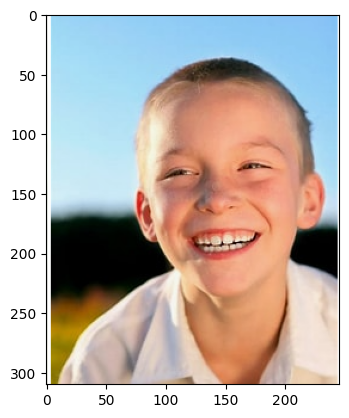

In [13]:
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [16]:
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(image,
            predictions[0]['dominant_emotion'],
            (0, 50),
            font,
            3,
            (0, 0, 255), # Green color for the text
            2,
            cv2.LINE_AA);

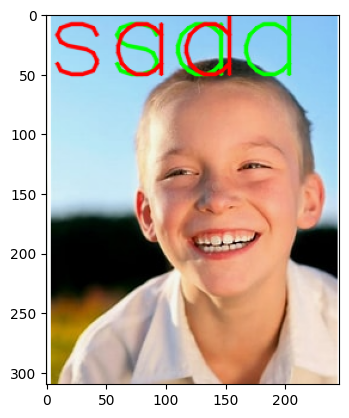

In [17]:
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [31]:
image = cv2.imread("sad_women.jpeg.jpeg")

In [29]:
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
  print(f'User uploaded file "{filename}" with length {len(uploaded[filename])} bytes')


Saving sad_women.jpeg.jpeg to sad_women.jpeg.jpeg
User uploaded file "sad_women.jpeg.jpeg" with length 101591 bytes


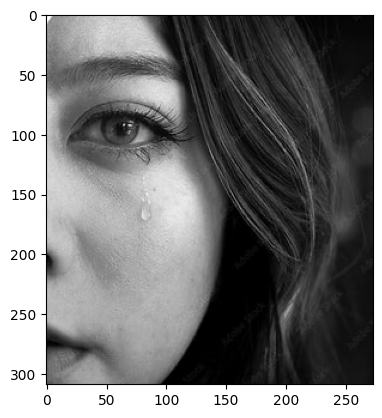

In [32]:
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [34]:
predictions = DeepFace.analyze(image, enforce_detection=False)

Action: race: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


In [35]:
predictions

[{'emotion': {'angry': np.float32(0.23096925),
   'disgust': np.float32(2.4154907e-09),
   'fear': np.float32(0.031582654),
   'happy': np.float32(0.0024641429),
   'sad': np.float32(3.084291),
   'surprise': np.float32(0.0024589384),
   'neutral': np.float32(96.648224)},
  'dominant_emotion': 'neutral',
  'region': {'x': 0,
   'y': 0,
   'w': 272,
   'h': 308,
   'left_eye': None,
   'right_eye': None},
  'face_confidence': 0.0,
  'age': 25,
  'gender': {'Woman': np.float32(61.970615), 'Man': np.float32(38.02938)},
  'dominant_gender': 'Woman',
  'race': {'asian': np.float32(0.5738334),
   'indian': np.float32(11.39457),
   'black': np.float32(0.69133973),
   'white': np.float32(46.39221),
   'middle eastern': np.float32(14.065012),
   'latino hispanic': np.float32(26.883036)},
  'dominant_race': 'white'}]

In [40]:
image = cv2.imread("fear.jpeg.jpeg")

In [37]:
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
  print(f'User uploaded file "{filename}" with length {len(uploaded[filename])} bytes')


Saving fear.jpeg.jpeg to fear.jpeg.jpeg
User uploaded file "fear.jpeg.jpeg" with length 134038 bytes


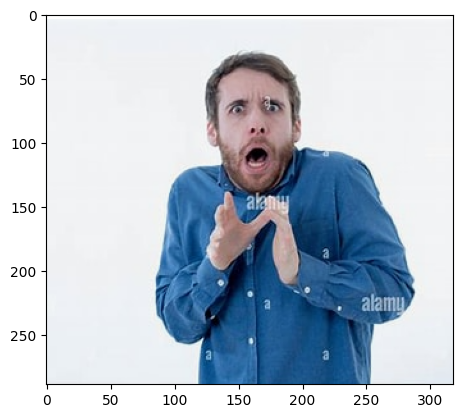

In [41]:
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [42]:
predictions = DeepFace.analyze(image, enforce_detection=False)

Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]


In [43]:
predictions

[{'emotion': {'angry': np.float32(0.00019672354),
   'disgust': np.float32(7.349531e-06),
   'fear': np.float32(0.0024341685),
   'happy': np.float32(2.2485888e-06),
   'sad': np.float32(6.8810516e-07),
   'surprise': np.float32(99.99736),
   'neutral': np.float32(2.343942e-12)},
  'dominant_emotion': 'surprise',
  'region': {'x': 124,
   'y': 44,
   'w': 78,
   'h': 78,
   'left_eye': (176, 71),
   'right_eye': (149, 74)},
  'face_confidence': 0.92,
  'age': 31,
  'gender': {'Woman': np.float32(0.0050336802), 'Man': np.float32(99.99497)},
  'dominant_gender': 'Man',
  'race': {'asian': np.float32(0.5876788),
   'indian': np.float32(2.2191598),
   'black': np.float32(0.112655096),
   'white': np.float32(55.874283),
   'middle eastern': np.float32(24.421783),
   'latino hispanic': np.float32(16.784445)},
  'dominant_race': 'white'}]